In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk import ngrams
from nltk import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer
from sklearn import metrics



In [2]:
df = pd.read_csv("ISEAR.csv", header=None)
df.head()

,0,1,2
0,joy,On days when I feel close to my partner and ot...,NaN
1,fear,Every time I imagine that someone I love or I ...,NaN
2,anger,When I had been obviously unjustly treated and...,NaN
3,sadness,When I think about the short time that we live...,NaN
4,disgust,At a gathering I found myself involuntarily si...,NaN


In [3]:
col = [0,1]
new_df = df[col]
new_df = new_df[pd.notnull(df[1])]
new_df.columns = ['Emotion','Text']
new_df.head()

,Emotion,Text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


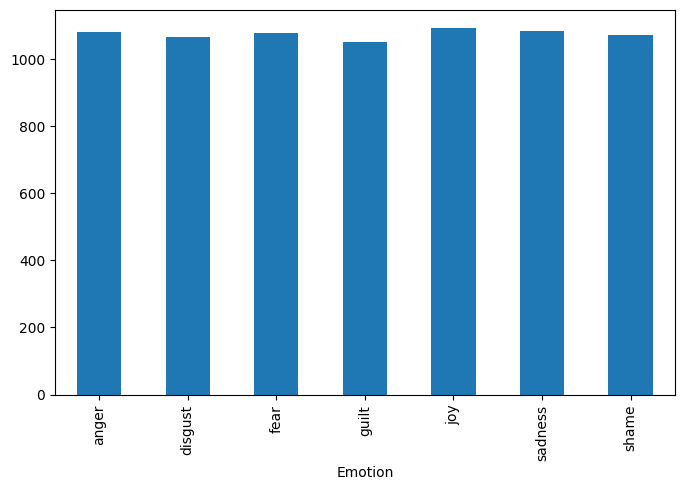

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 5))
new_df.groupby('Emotion').Text.count().plot.bar(ylim=0)
plt.show()

In [5]:
new_df['Text']
new_df['Emotion']

0           joy
1          fear
2         anger
3       sadness
4       disgust
         ...   
7511      shame
7512      shame
7513       fear
7514      guilt
7515       fear
Name: Emotion, Length: 7516, dtype: object

In [6]:
def getTokenizedList(input_df):
    tokenizedList = []
    for i in range(0, len(input_df)):
        curText = input_df['Text'].iloc[i]
        curText = curText.replace('\n', '')
        curTokenized = word_tokenize(curText)
        tokenizedList.append(curTokenized)

    tokenizedListWithoutPunct = []
    punctList = list(string.punctuation)  # Perbaiki penulisan di sini
    for i in range(0, len(tokenizedList)):
        curList = tokenizedList[i]
        newList = []
        for word in curList:  # Pastikan penamaan konsisten
            if word.lower() not in punctList:
                newList.append(word.lower())
        tokenizedListWithoutPunct.append(newList)

    # Stemming
    mystemmer = PorterStemmer()
    tokenizedStemmed = []
    for i in range(0, len(tokenizedListWithoutPunct)):
        curList = tokenizedListWithoutPunct[i]
        newList = []
        for word in curList:
            newList.append(mystemmer.stem(word))
        tokenizedStemmed.append(newList)
    return tokenizedStemmed


In [7]:
def transformSentence(sent):
    s =[]
    sent=sent.replace('\n','')
    sentTokenized=word_tokenize(sent)
    s.append(sentTokenized)
    sWithoutPunct = []
    punctList = list(string.punctuation)
    curSentList = s[0]
    newSentList = []
    for word in curSentList:
        if (word.lower() not in punctList):
            newSentList.append(word.lower())
    sWithoutPunct.append(newSentList)
    mystemmer = PorterStemmer()
    tokenziedStemmed = []
    for i in range(0, len(sWithoutPunct)):
        curList=sWithoutPunct[i]
        newList=[]
        for word in curList:
            newList.append(mystemmer.stem(word))
        tokenziedStemmed.append(newList)
    return tokenziedStemmed

In [8]:
!python -m nltk.downloader punkt

c:\Users\ROSSY\AppData\Local\Programs\Python\Python312\python.exe: No module named nltk.downloader punkt


In [10]:
new_df['Text']=getTokenizedList(new_df)

In [11]:
X_train, X_test, Y_train, Y_test=train_test_split(new_df['Text'],new_df['Emotion'], test_size=.3,random_state=1)

In [12]:
def returnPhrase(inputList):
    return inputList

In [13]:
#Extracting features for Naive Bayes 

myVectorizer=TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3), max_features=4000) 
myVectorizer.fit(X_train) 
transformedTrain=myVectorizer.transform(X_train).toarray() 
transformedTest=myVectorizer.transform(X_test).toarray()

In [14]:
curAlpha=0.33 #smoothing factor in NB
NBClassifier=MultinomialNB(alpha=curAlpha)
NBClassifier.fit(transformedTrain,Y_train)
myPredTest=NBClassifier.predict(transformedTest)
print('Best Acc Naive Bayes')
#print(curAlpha)
print(np.sum(myPredTest==Y_test)/len(Y_test))

Best Acc Naive Bayes
0.5658536585365853


In [15]:
print('metrics Classification Report: Naive Bayes')
print(metrics.classification_report(Y_test, myPredTest))

metrics Classification Report: Naive Bayes
              precision    recall  f1-score   support

       anger       0.49      0.50      0.49       331
     disgust       0.60      0.59      0.60       324
        fear       0.62      0.64      0.63       311
       guilt       0.45      0.55      0.49       299
         joy       0.67      0.64      0.65       323
     sadness       0.67      0.60      0.63       351
       shame       0.48      0.45      0.47       316

    accuracy                           0.57      2255
   macro avg       0.57      0.57      0.57      2255
weighted avg       0.57      0.57      0.57      2255



In [16]:
myVectorizer=TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3),max_features=4000)
myVectorizer.fit(X_train)
transformedTrain=myVectorizer.transform(X_train).toarray()
transformedTest=myVectorizer.transform(X_test).toarray()

In [17]:
curC=2
SVMClassifier=svm.LinearSVC(C=curC)
SVMClassifier.fit(transformedTrain,Y_train)
myPredTest=SVMClassifier.predict(transformedTest)
print('Best ACC SVM')
#print(curC)
print(np.sum(myPredTest==Y_test)/len(Y_test))

Best ACC SVM
0.5605321507760532


In [18]:
print('Metrics Classification Report : SVM')
print(metrics.classification_report(Y_test, myPredTest))

Metrics Classification Report : SVM
              precision    recall  f1-score   support

       anger       0.44      0.46      0.45       331
     disgust       0.57      0.55      0.56       324
        fear       0.64      0.63      0.64       311
       guilt       0.45      0.51      0.47       299
         joy       0.70      0.67      0.69       323
     sadness       0.66      0.64      0.65       351
       shame       0.48      0.47      0.47       316

    accuracy                           0.56      2255
   macro avg       0.56      0.56      0.56      2255
weighted avg       0.56      0.56      0.56      2255



In [19]:
#To predict the emotion of a sentence using Naive Bayes
def predictSentNB(sent):
    sentPred = NBClassifier.predict(myVectorizer.transform(transformSentence(sent)).toarray())
    return sentPred

In [20]:
def predictSentNB(sent):
    sentPred = SVMClassifier.predict(myVectorizer.transform(transformSentence(sent)).toarray())
    return sentPred

In [21]:
sent = 'I love you to the moon and back'

#printing the predicted emotion
print('Naive bayes prediction')
print(predictSentNB(sent))
print('SVM prediction')
print(predictSentNB(sent))

Naive bayes prediction
['joy']
SVM prediction
['joy']


In [26]:
pip install seaborn matplotlib

<function matplotlib.pyplot.show(close=None, block=None)>

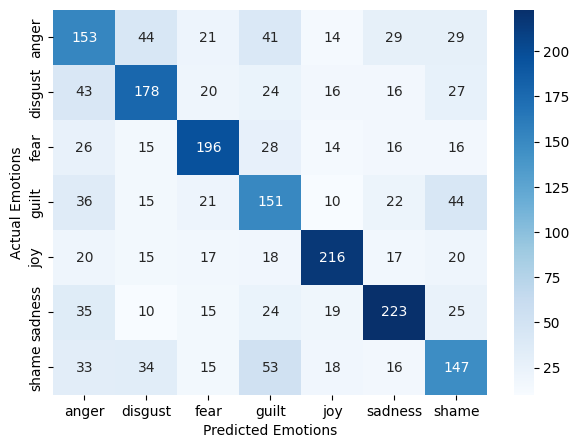

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels=['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame']
cm = confusion_matrix(Y_test, myPredTest, labels=labels)

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(cm, annot=True,fmt='d',xticklabels=labels, yticklabels=labels,cmap='Blues')
plt.ylabel('Actual Emotions')
plt.xlabel('Predicted Emotions')
plt.show